#### Загрузка данных и первичный анализ

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [67]:
from sklearn.datasets import make_moons, load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.inspection import permutation_importance

In [50]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [51]:
df = pd.read_csv('S06-hw-dataset-03.csv')

df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      15000 non-null  int64  
 1   f01     15000 non-null  float64
 2   f02     15000 non-null  float64
 3   f03     15000 non-null  float64
 4   f04     15000 non-null  float64
 5   f05     15000 non-null  float64
 6   f06     15000 non-null  float64
 7   f07     15000 non-null  float64
 8   f08     15000 non-null  float64
 9   f09     15000 non-null  float64
 10  f10     15000 non-null  float64
 11  f11     15000 non-null  float64
 12  f12     15000 non-null  float64
 13  f13     15000 non-null  float64
 14  f14     15000 non-null  float64
 15  f15     15000 non-null  float64
 16  f16     15000 non-null  float64
 17  f17     15000 non-null  float64
 18  f18     15000 non-null  float64
 19  f19     15000 non-null  float64
 20  f20     15000 non-null  float64
 21  f21     15000 non-null  float64
 22

,id,f01,f02,f03,f04,f05,f06,f07,f08,f09,...,f20,f21,f22,f23,f24,f25,f26,f27,f28,target
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,...,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,7500.500000,-0.840416,-0.011530,0.755463,0.008092,-0.246559,0.992538,-0.004599,-0.005366,0.011024,...,0.008801,0.004798,-0.060611,-0.008095,0.002397,0.699377,-0.001170,1.380216,0.150765,0.612600
std,4330.271354,1.785432,1.007374,3.663136,0.996556,2.216202,3.943110,2.113607,1.001960,1.006309,...,0.988931,0.999959,3.747823,0.994912,0.990567,3.801468,0.996588,3.929134,2.005847,0.740016
min,1.000000,-8.199174,-4.100091,-13.591257,-3.992807,-8.243563,-14.950758,-8.522298,-3.768197,-3.791645,...,-3.612116,-4.150852,-15.977469,-3.664246,-3.857890,-16.273835,-4.536600,-12.105957,-8.300728,0.000000
25%,3750.750000,-2.029608,-0.686265,-1.593729,-0.674039,-1.738188,-1.580544,-1.380091,-0.673001,-0.661451,...,-0.674236,-0.669654,-2.517892,-0.676471,-0.661098,-1.842677,-0.668133,-1.339314,-1.235425,0.000000
50%,7500.500000,-0.855943,-0.010454,0.744919,0.009431,-0.203512,1.110848,0.134466,-0.003663,0.004158,...,0.020916,0.010701,0.019034,-0.001622,0.001807,0.780608,-0.007763,1.108728,0.137089,0.000000
75%,11250.250000,0.313482,0.674347,3.057234,0.677459,1.254102,3.700201,1.443666,0.662753,0.683465,...,0.681036,0.676786,2.521745,0.659456,0.663270,3.297387,0.676626,3.869991,1.524830,1.000000
max,15000.000000,7.338969,4.418126,17.965154,3.887820,8.542916,15.618988,7.575797,3.698010,3.963730,...,3.497004,3.828639,12.661894,4.214633,4.378893,17.152063,3.618447,18.906060,8.007400,2.000000


In [52]:
# распределение таргета
df["target"].value_counts(normalize=True)


target
0    0.542533
1    0.302333
2    0.155133
Name: proportion, dtype: float64

In [53]:
# проверка пропусков
df.isna().sum()

id        0
f01       0
f02       0
f03       0
f04       0
f05       0
f06       0
f07       0
f08       0
f09       0
f10       0
f11       0
f12       0
f13       0
f14       0
f15       0
f16       0
f17       0
f18       0
f19       0
f20       0
f21       0
f22       0
f23       0
f24       0
f25       0
f26       0
f27       0
f28       0
target    0
dtype: int64

In [54]:
target_c = "target"
id_c = ["id"]

X = df.drop(columns=[target_c] + id_c)
y = df[target_c]

display(X.head())
display(y.head())
X.shape, y.shape


,f01,f02,f03,f04,f05,f06,f07,f08,f09,f10,...,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28
0,-2.721419,0.652294,1.867234,-0.245331,-0.241182,-0.195509,1.180193,-0.724816,1.804165,-2.710871,...,0.196307,0.042851,-0.153232,1.566167,-1.516125,-1.586857,-3.998937,-1.308459,2.155125,1.992519
1,-4.191520,-0.647731,-0.881929,-0.968159,3.530725,-4.858592,0.240979,-0.714017,0.285769,-3.199756,...,-0.699512,-1.170056,0.631661,1.277915,-0.464432,1.927986,6.034154,0.149833,4.861592,-3.547303
2,-0.582739,0.415128,-4.205613,-0.320853,0.313570,-2.655451,2.215387,1.492222,-0.516727,-2.083180,...,-0.130321,0.083281,-0.757912,5.672669,-0.283472,0.275362,-0.988055,0.940883,-3.050749,-0.703865
3,-1.766082,1.253523,1.610804,0.466067,3.837868,-3.564073,-1.831031,1.066265,-0.198636,-1.256530,...,-0.717143,-0.674648,1.780285,-4.718432,0.711573,1.705610,6.474380,-1.690537,8.687735,-2.799399
4,-2.157834,-1.361285,-0.917199,0.937285,0.408551,-0.062032,-0.480196,-0.554454,-1.026434,0.135839,...,0.418556,-0.096277,0.212875,1.710699,2.476220,0.669305,3.166072,-0.718493,3.630457,0.083986


0    0
1    0
2    1
3    0
4    0
Name: target, dtype: int64

((15000, 28), (15000,))

#### Train/Test-сплит и воспроизводимость

In [55]:
RANDOM_STATE = 42
TEST_SIZE = 0.2  # или 0.25

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=y
)

X_train.shape, X_test.shape

((12000, 28), (3000, 28))

Мы фиксируем `random_state`, чтобы код при запуске каждый раз выдавал одинаковый результат (иначе разбиение данных было бы разным, метрики бы прыгали и было бы сложнее сравнивать модели)

Стратификация же важна, чтобы пропорции test и train оставались такие же, как в исходном датасете (примерно)

#### Baseline’ы

##### DummyClassifier

In [56]:
dummy_clf = DummyClassifier(strategy="most_frequent", random_state=RANDOM_STATE)
dummy_clf.fit(X_train, y_train)

y_pred_dummy = dummy_clf.predict(X_test)

accuracy_dummy = accuracy_score(y_test, y_pred_dummy)
f1_macro_dummy = f1_score(y_test, y_pred_dummy, average="macro")

print("DummyClassifier (most_frequent)")
print(f"Accuracy:   {accuracy_dummy:.4f}")
print(f"F1-macro:   {f1_macro_dummy:.4f}")


DummyClassifier (most_frequent)
Accuracy:   0.5427
F1-macro:   0.2345


##### LogisticRegression (через Pipeline)

In [57]:
logreg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000))
])

logreg_pipeline.fit(X_train, y_train)

y_pred_logreg = logreg_pipeline.predict(X_test)

accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
f1_macro_logreg = f1_score(y_test, y_pred_logreg, average="macro")

print("LogisticRegression (multinomial)")
print(f"Accuracy:   {accuracy_logreg:.4f}")
print(f"F1-macro:   {f1_macro_logreg:.4f}")


LogisticRegression (multinomial)
Accuracy:   0.7237
F1-macro:   0.6651


#### Модели недели 6

In [58]:
# общий CV-сплит
cv = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=RANDOM_STATE
)

Делаю общую функцию для GridSearchCV, чтобы не дублировать код

In [59]:
def run_grid_search(model, param_grid, X_train, y_train, cv, scoring="f1_macro", model_name="model"):
    """
    Запускает GridSearchCV, обучает на train и возвращает обученный GridSearchCV.
    """
    grid = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        scoring=scoring,
        cv=cv,
        n_jobs=-1,
        verbose=1
    )
    print(f"Запускаем GridSearchCV для {model_name}...")
    grid.fit(X_train, y_train)
    print(f"Лучшие параметры для {model_name}: {grid.best_params_}")
    print(f"Лучший CV-score ({scoring}) для {model_name}: {grid.best_score_:.4f}")
    return grid


Decision Tree

In [60]:
dt_clf = DecisionTreeClassifier(random_state=RANDOM_STATE)

dt_param_grid = {
    "max_depth": [3, 5, 7, 9, None],
    "min_samples_leaf": [1, 2, 5, 10],
    "min_samples_split": [2, 5, 10]
}

dt_grid = run_grid_search(
    dt_clf,
    dt_param_grid,
    X_train,
    y_train,
    cv,
    scoring="f1_macro",
    model_name="DecisionTree"
)

best_dt = dt_grid.best_estimator_

y_pred_dt = best_dt.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
f1_macro_dt = f1_score(y_test, y_pred_dt, average="macro")

print("DecisionTreeClassifier (best)")
print(f"Accuracy:   {accuracy_dt:.4f}")
print(f"F1-macro:   {f1_macro_dt:.4f}")


Запускаем GridSearchCV для DecisionTree...
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Лучшие параметры для DecisionTree: {'max_depth': None, 'min_samples_leaf': 10, 'min_samples_split': 2}
Лучший CV-score (f1_macro) для DecisionTree: 0.7325
DecisionTreeClassifier (best)
Accuracy:   0.7973
F1-macro:   0.7506


RandomForestClassifier

In [61]:
rf_clf = RandomForestClassifier(
    random_state=RANDOM_STATE,
    n_jobs=-1
)

rf_param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 5, 10],
    "min_samples_leaf": [1, 2, 5],
    "max_features": ["sqrt", "log2", None]
}

rf_grid = run_grid_search(
    rf_clf,
    rf_param_grid,
    X_train,
    y_train,
    cv,
    scoring="f1_macro",
    model_name="RandomForest"
)

best_rf = rf_grid.best_estimator_

y_pred_rf = best_rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_macro_rf = f1_score(y_test, y_pred_rf, average="macro")

print("RandomForestClassifier (best)")
print(f"Accuracy:   {accuracy_rf:.4f}")
print(f"F1-macro:   {f1_macro_rf:.4f}")


Запускаем GridSearchCV для RandomForest...
Fitting 5 folds for each of 54 candidates, totalling 270 fits
Лучшие параметры для RandomForest: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'n_estimators': 200}
Лучший CV-score (f1_macro) для RandomForest: 0.8448
RandomForestClassifier (best)
Accuracy:   0.8860
F1-macro:   0.8599


Boosting - GradientBoostingClassifier

In [62]:
gb_clf = GradientBoostingClassifier(random_state=RANDOM_STATE)

gb_param_grid = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.05, 0.1, 0.2],
    "max_depth": [2, 3, 4],
    "min_samples_leaf": [1, 2, 5]
}

gb_grid = run_grid_search(
    gb_clf,
    gb_param_grid,
    X_train,
    y_train,
    cv,
    scoring="f1_macro",
    model_name="GradientBoosting"
)

best_gb = gb_grid.best_estimator_

y_pred_gb = best_gb.predict(X_test)

accuracy_gb = accuracy_score(y_test, y_pred_gb)
f1_macro_gb = f1_score(y_test, y_pred_gb, average="macro")

print("GradientBoostingClassifier (best)")
print(f"Accuracy:   {accuracy_gb:.4f}")
print(f"F1-macro:   {f1_macro_gb:.4f}")


Запускаем GridSearchCV для GradientBoosting...
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Лучшие параметры для GradientBoosting: {'learning_rate': 0.2, 'max_depth': 4, 'min_samples_leaf': 1, 'n_estimators': 200}
Лучший CV-score (f1_macro) для GradientBoosting: 0.8526
GradientBoostingClassifier (best)
Accuracy:   0.8810
F1-macro:   0.8506


#### Метрики качества

Соберём всё в один словарь

In [63]:
metrics_test = {
    "DummyClassifier": {
        "accuracy": accuracy_dummy,
        "f1_macro": f1_macro_dummy
    },
    "LogisticRegression": {
        "accuracy": accuracy_logreg,
        "f1_macro": f1_macro_logreg
    },
    "DecisionTree": {
        "accuracy": accuracy_dt,
        "f1_macro": f1_macro_dt
    },
    "RandomForest": {
        "accuracy": accuracy_rf,
        "f1_macro": f1_macro_rf
    },
    "GradientBoosting": {
        "accuracy": accuracy_gb,
        "f1_macro": f1_macro_gb
    }
}

pd.DataFrame(metrics_test).T



,accuracy,f1_macro
DummyClassifier,0.542667,0.234515
LogisticRegression,0.723667,0.665128
DecisionTree,0.797333,0.750632
RandomForest,0.886000,0.859867
GradientBoosting,0.881000,0.850558


Выбираем лучшую модель по критерию - максимальный f1_macro на test

In [64]:
best_model_name = None
best_model_score = -np.inf

for name, m in metrics_test.items():
    if m["f1_macro"] > best_model_score:
        best_model_score = m["f1_macro"]
        best_model_name = name

best_model_name, best_model_score

('RandomForest', 0.8598667922339419)

Теперь сопоставим имя с объектом модели:

In [65]:
model_objects = {
    "DummyClassifier": dummy_clf,
    "LogisticRegression": logreg_pipeline,
    "DecisionTree": best_dt,
    "RandomForest": best_rf,
    "GradientBoosting": best_gb
}

best_model = model_objects[best_model_name]
best_model

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y

Так как в мультиклассе обычная ROC-кривая не работает (тк рассчитана на бинарную задачу), то применим OVR (One-vs-Rest) - построим ROC-кривую для каждого класса против всех остальных, и усредним

Но для начала проверим поддерживает ли модель `predict_proba`. Если да — считаем OVR

In [69]:
has_proba = hasattr(best_model, "predict_proba")
has_proba

True

In [70]:
if has_proba:
    y_proba_best = best_model.predict_proba(X_test)
    roc_auc_ovr = roc_auc_score(y_test, y_proba_best, multi_class="ovr")
    print(f"Multi-class ROC-AUC (OVR) для {best_model_name}: {roc_auc_ovr:.4f}")
else:
    print(f"Модель {best_model_name} не поддерживает predict_proba — ROC-AUC не считаю")

Multi-class ROC-AUC (OVR) для RandomForest: 0.9499


А теперь создадим диагностические графики для лучшей модели:

Confusion Matrix

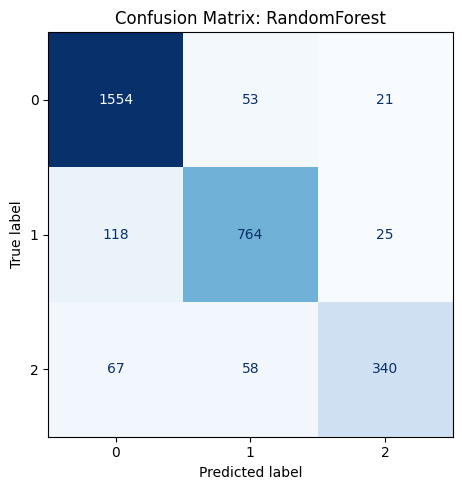

In [68]:
y_pred_best = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(5, 5))
disp.plot(ax=ax, cmap="Blues", colorbar=False)
plt.title(f"Confusion Matrix: {best_model_name}")
plt.tight_layout()
plt.show()

#### Интерпретация

In [71]:
result = permutation_importance(
    best_model,
    X_test,
    y_test,
    scoring="f1_macro",
    n_repeats=20,
    random_state=RANDOM_STATE,
    n_jobs=-1
)

importances_mean = result.importances_mean
importances_std = result.importances_std

feature_importances = pd.DataFrame({
    "feature": feature_cols,
    "importance_mean": importances_mean,
    "importance_std": importances_std
}).sort_values(by="importance_mean", ascending=False)

feature_importances.head(15)


,feature,importance_mean,importance_std
12,f13,0.173899,0.007665
4,f05,0.133126,0.004934
27,f28,0.101268,0.005072
0,f01,0.077377,0.004886
9,f10,0.068637,0.004576
17,f18,0.064918,0.004319
11,f12,0.057882,0.005190
14,f15,0.049949,0.003538
16,f17,0.049338,0.003982
26,f27,0.047037,0.004275


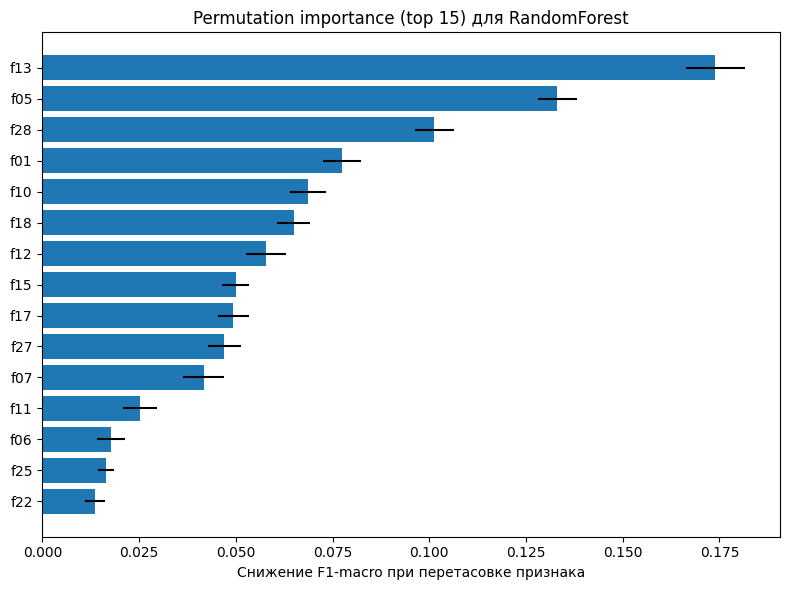

In [72]:
# виуализируем топ-15
top_n = 15
top_features = feature_importances.head(top_n).iloc[::-1]  # переворачиваем для красивого горизонтального бара

plt.figure(figsize=(8, 6))
plt.barh(top_features["feature"], top_features["importance_mean"], xerr=top_features["importance_std"])
plt.title(f"Permutation importance (top {top_n}) для {best_model_name}")
plt.xlabel("Снижение F1-macro при перетасовке признака")
plt.tight_layout()
plt.show()


#### Артефакты эксперимента

In [79]:
import json
import os
from joblib import dump

In [80]:
artifacts_dir = "artifacts"
figures_dir = os.path.join(artifacts_dir, "figures")

os.makedirs(figures_dir, exist_ok=True)


metrics_path = os.path.join(artifacts_dir, "metrics_test.json")
with open(metrics_path, "w") as f:
    json.dump(metrics_test, f, indent=4)
metrics_path

metrics_path = os.path.join(artifacts_dir, "metrics_test.json")
with open(metrics_path, "w") as f:
    json.dump(metrics_test, f, indent=4)
metrics_path

search_summaries = {
    "DecisionTree": {
        "best_params": dt_grid.best_params_,
        "best_cv_score_f1_macro": dt_grid.best_score_
    },
    "RandomForest": {
        "best_params": rf_grid.best_params_,
        "best_cv_score_f1_macro": rf_grid.best_score_
    },
    "GradientBoosting": {
        "best_params": gb_grid.best_params_,
        "best_cv_score_f1_macro": gb_grid.best_score_
    }
}

search_summaries_path = os.path.join(artifacts_dir, "search_summaries.json")
with open(search_summaries_path, "w") as f:
    json.dump(search_summaries, f, indent=4)
search_summaries_path


'artifacts\\search_summaries.json'

In [81]:
best_model_path = os.path.join(artifacts_dir, "best_model.joblib")
dump(best_model, best_model_path)
best_model_path


'artifacts\\best_model.joblib'

In [83]:
best_model_meta = {
    "best_model_name": best_model_name,
    "metrics_test": metrics_test[best_model_name]
}

if has_proba:
    best_model_meta["roc_auc_ovr"] = float(roc_auc_ovr)

best_model_meta_path = os.path.join(artifacts_dir, "best_model_meta.json")
with open(best_model_meta_path, "w") as f:
    json.dump(best_model_meta, f, indent=4)
best_model_meta_path

'artifacts\\best_model_meta.json'

Сохранение графиков в figures

In [84]:
fig, ax = plt.subplots(figsize=(5, 5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax, cmap="Blues", colorbar=False)
plt.title(f"Confusion Matrix: {best_model_name}")
plt.tight_layout()

cm_fig_path = os.path.join(figures_dir, "confusion_matrix_best_model.png")
plt.savefig(cm_fig_path)
plt.close(fig)

cm_fig_path


'artifacts\\figures\\confusion_matrix_best_model.png'

In [85]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(top_features["feature"], top_features["importance_mean"], xerr=top_features["importance_std"])
ax.set_title(f"Permutation importance (top {top_n}) для {best_model_name}")
ax.set_xlabel("Снижение F1-macro при перетасовке признака")
plt.tight_layout()

pi_fig_path = os.path.join(figures_dir, "permutation_importance_best_model.png")
plt.savefig(pi_fig_path)
plt.close(fig)

pi_fig_path


'artifacts\\figures\\permutation_importance_best_model.png'